# Simple Linear Regression using Gradient Descent

In the previous notebook, we looked at a high level overview of solving our simple linear regression problem using gradient descent. Now, we'll formalize that, actually calculate the derivatives that we need to implement it, and use `numpy` to do so. 

## Using Gradient Descent for Simple Linear Regression

### Gradient Descent Procedure 

Formally, with gradient descent we will do the following: 

1. Randomly initialize values for our coefficients, 
<img src="../imgs/variables/beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=20 \> and
<img src="../imgs/variables/beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=22 \>   

2. While we haven't met some stopping condition:   
 A. Calculate our predicted values, 
<img src="../imgs/variables/yhat.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=13 \>, using our simple linear regression equation
(<img src="../imgs/equations/simp_linear.png" width=100 style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" \>).  
 B. Calculate the error for each observation using the true values
<img src="../imgs/variables/yi.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=17 \>, 
our predicted values 
<img src="../imgs/variables/yhati.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=16 \>, 
and our error formula: 
<img src="../imgs/equations/ind_squared_error.png" width=110 \>      
 C. For each observation, calculate the gradient of the error with respect to each one of our coefficients (
<img src="../imgs/derivatives/ei_beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>, 
<img src="../imgs/derivatives/ei_beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>
), and then use the average across observations to update the coefficients: 
<img src="../imgs/updates/beta0_simp_linear_update.png" width=150 \>
<img src="../imgs/updates/beta1_simp_linear_update.png" width=150 \>

Note that we are subtracting off the gradient in step 2C because the gradient gives us the direction of steepest ascent (and we want to take the direction of steepest descent to minimize our error). Note also that 
<img src="../imgs/variables/alpha.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=15\> 
in step 2C is simply the learning rate (e.g. how much of the coefficient updates actually get applied). 

Now, let's actually calculate the derivatives. 

### Derivative Calculations

Recall that we'll use the chain rule to calculate the updates that we need for step 2C: 

<img src="../imgs/derivatives/ei_beta0_chain.png" width=120\>
<img src="../imgs/derivatives/ei_beta1_chain.png" width=110\>

To calculate these, we'll need three quantities - 
<img src="../imgs/derivatives/ei_yi.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>, 
<img src="../imgs/derivatives/yhati_beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>, 
<img src="../imgs/derivatives/yhati_beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>. We can calculate these as follows: 

<img src="../imgs/derivatives/ei_yi_soln.png" width=275 \>
<img src="../imgs/derivatives/yhati_beta0_soln.png" width=75 \>
<img src="../imgs/derivatives/yhati_beta1_soln.png" width=90 \>

We can then plug these in to obtain our updates for step 2C: 

<img src="../imgs/derivatives/ei_beta0_chain_soln.png" width=350\>
<img src="../imgs/derivatives/ei_beta1_chain_soln.png" width=290\>

Check out these [notes from Andrej Karpathy](http://karpathy.github.io/neuralnets/) for a refresher on gradient descent or a more thorough but still simplistic discussion of backpropagation (the code in the notes is written in `JavaScript`, but it is fairly simplistic and Andrej does an excellent job with his explanations). 

## Simple Linear Regression using Gradient Descent with `numpy`

We'll begin our `numpy` implementation by generating some fake data. To obtain some fake data that follows a univariate linear relationship, we'll use a function from the `datasets/general.py`. With the function `gen_simple_linear`, we'll input a <img src="../imgs/variables/beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=20 \>, 
<img src="../imgs/variables/beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=22 \>, 
and number of observations. We'll receive as output data that follows a univariate linear relationship specified by 
 <img src="../imgs/variables/beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=20 \> 
and 
<img src="../imgs/variables/beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=22 \> 
(<img src="../imgs/equations/simp_linear.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=110 \>). Using this data, we'll learn the coefficients using gradient descent as specified above. We'll plot the mean-squared-error over each iteration so that we can see our model learning. 

In [1]:
import numpy as np
from datasets.general import gen_simple_linear
from utils.plotting import plot_errors
%matplotlib inline

In [2]:
def learn_w_gradient_descent(xs, ys): 
    learning_rate = 0.1
    # Step 1 - randomly initialize values for our coefficients. 
    beta_0, beta_1 = np.random.randint(1, 10, size=2)
    
    mses = [] # mean-squared-errors list to keep track of errors over iterations
    for _ in range(5000): 
        # Step 2A - calculate our predicted values. 
        yhats = beta_0 + beta_1 * xs
        
        # Step 2B - calculate our errors. 
        diffs = (ys - yhats)
        es = 0.5 * (diffs ** 2)
        mses.append(es.mean())
        
        # Step 2C - calculate the gradient of the error with respect to the coefficients, 
        # and use it to update the coefficients.
        d_beta_0 = -diffs
        d_beta_1 = -diffs * xs
        beta_0 -= learning_rate * d_beta_0.mean()
        beta_1 -= learning_rate * d_beta_1.mean()
    
    return mses

Final Error: 1.2095007887784031e-28


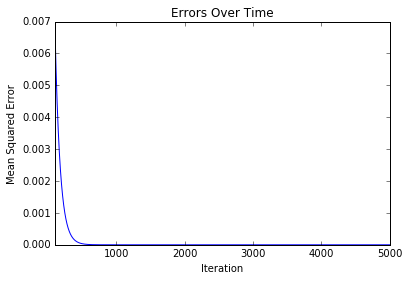

In [3]:
# Randomly generate a beta_0, beta_1, and number of observations, used to generate 
# fake data to fit. We should have a minimum of 2 obs, since we have two coefficients.
true_beta_0, true_beta_1 = np.random.randint(2, 10, size=2) 
n_obs = np.random.randint(9500, 10500) 

# Generate the data that follows a univariate linear relationship specified 
# by true_beta_0 and true_beta_1.
xs, ys = gen_simple_linear(true_beta_0, true_beta_1, n_obs)

# Learn the coefficients using gradient descent. 
mean_squared_errors = learn_w_gradient_descent(xs, ys)
# Skip the first 100 values because it pulls the y-axis up quite a bit. 
plot_errors(mean_squared_errors, iterations=(100, 5000)) 
print("Final Error: {}".format(mean_squared_errors[-1]))

The plot above demonstrates that we can in fact solve linear regression using gradient descent, as we're able to achieve effectively 0 mean-squared error. We can even run it multiple times, and see that each time, our gradient descent procedure is able to achieve this same 0 error. We could also play around with the `learning_rate` to see how that changes the mean-squared-errors, and/or look at different subests of the `mean_squared_errors` list (iterations ~300-1000 are much more interesting to look at). 

All in all, this isn't terribly useful. But, it'll help set the stage for understanding complicated neural network architectures. At the end of the day, most (if not all) neural networks can be viewed as having a **forward** and **backward** propagation step where we can use some flavor of gradient descent to update and learn our coefficients (often called weights in neural network land).

We'll now move on to coding this up using `theano`, a python library that allows us to define computational graphs and benefit from automatic differentiation. Libraries like this will be extremely useful when building incredibly complicated neural networks for which it is difficult and time consuming to derive the update rules by hand. 